# **Natural Language Processing and Pink Floyd**

---


The **objective of the work** is to apply Natural Language Processing techniques to the Pink Floyd song lyrics database, in order to identify patterns, evolutions and specific phases of the band. A base of questions and answers about the band will also be used. In particular, the following two NLP topics were chosen:

* **Topic Modeling**
* **Question and Answer Systems**

(\*) The **database of lyrics** used is from kaggle, and consists of a [dataset](https://www.kaggle.com/joaorobson/pink-floyd-lyrics) that contains all song lyrics from Pink Floyd's 15 studio albums, released between 1967 and 2014.

(\*\*) The **Q&A database** was built based on information from the [wikipedia page](https://pt.wikipedia.org/wiki/Pink_Floyd) of the band.

## About the band

The English rock band [Pink Floyd](https://pt.wikipedia.org/wiki/Pink_Floyd) (1965 - present) is known worldwide for progressive and psychedelic compositions, as well as lyrics with strong political and philosophical content. Like any band with a long history, Pink Floyd went through many phases, mainly marked by the social context of the time and the personal lives of the members.

We can divide the phases of the band into the following:

* **Early years** (1965-1967): Release of *The Piper at the Gates of Dawn* (1967); many psychedelic and ambient music influences;
* **Golden Era** (1968-1978): Release of the albums that established the band, such as *The Dark Side of The Moon* (1973), *Wish You Were Here* (1975) and *Animals* (1977);
* **Waters-led era** (1979-1984): Strong political influences and repetition of themes (mainly war and repression). Creation of the iconic and impactful album *The Wall* (1979);
* **Gilmour-led era** (1985-2014): More focused on the sound and progressive melodies; loses the political weight of the previous era and focuses on more open, poetic and philosophical lyrics.



*In the image below from left to right: Richard Wright, Roger Waters, Nick Mason and David Gilmour.*

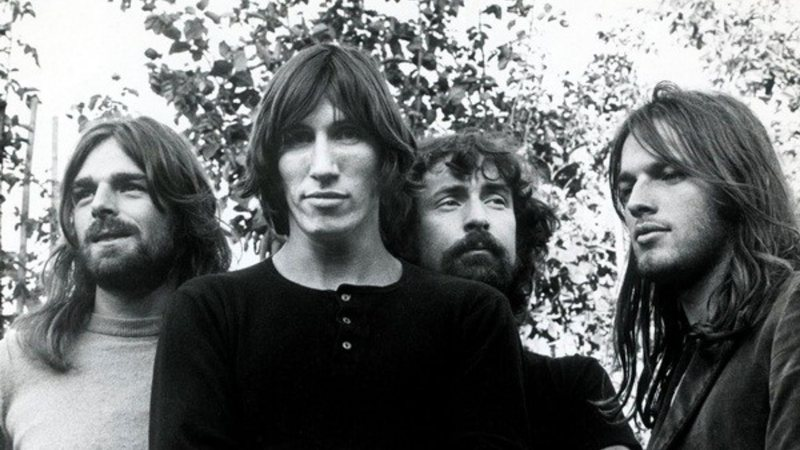

## Project

### **Topic Modeling**
---

**Topic Modeling** is suitable for having a high-level analysis of a large document, with the aim of understanding its content and the relationship between the topics in it. Unlike sentiment analysis, we do not know in advance what the topics of the text are.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
!gdown --id 18TtwBj5dmKJ_f0RVjtGafIknEkopiA5c
!gdown --id 13UCuGbGdOBr-_XPelBmEhexHP7vDmx2a

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=18TtwBj5dmKJ_f0RVjtGafIknEkopiA5c 

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13UCuGbGdOBr-_XPelBmEhexHP7vDmx2a
To: /content/QA-pinkfloyd.csv
100% 3.15k/3.15k [00:00<00:00, 5.54MB/s]


The dataset contains the album information, song title, year and the lyrics of the song:

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
songs = pd.read_csv("/content/pink_floyd_lyrics.csv")
songs.head()

,album,song_title,year,lyrics
0,The Piper at the Gates of Dawn,Astronomy Domine,1967-08-05,"""Moon in both [houses]...""...Scorpio, [Arabian..."
1,The Piper at the Gates of Dawn,Lucifer Sam,1967-08-05,"Lucifer Sam, siam cat\nAlways sitting by your ..."
2,The Piper at the Gates of Dawn,Matilda Mother,1967-08-05,There was a king who ruled the land\nHis Majes...
3,The Piper at the Gates of Dawn,Flaming,1967-08-05,Alone in the clouds all blue\nLying on an eide...
4,The Piper at the Gates of Dawn,Pow R. Toc H.,1967-08-05,TCH TCH\nAHH (AHH)\nTCH TCH\nAHH AHH\nDoi doi\...


In [9]:
# only the release year interests us
songs.year = songs.year.str.slice(0, 4)

songs.head()

,album,song_title,year,lyrics
0,The Piper at the Gates of Dawn,Astronomy Domine,1967,"""Moon in both [houses]...""...Scorpio, [Arabian..."
1,The Piper at the Gates of Dawn,Lucifer Sam,1967,"Lucifer Sam, siam cat\nAlways sitting by your ..."
2,The Piper at the Gates of Dawn,Matilda Mother,1967,There was a king who ruled the land\nHis Majes...
3,The Piper at the Gates of Dawn,Flaming,1967,Alone in the clouds all blue\nLying on an eide...
4,The Piper at the Gates of Dawn,Pow R. Toc H.,1967,TCH TCH\nAHH (AHH)\nTCH TCH\nAHH AHH\nDoi doi\...


In [10]:
songs.tail()

,album,song_title,year,lyrics
158,The Endless River,Surfacing,2014,NaN
159,The Endless River,Louder than Words,2014,We bitch and we fight\nDiss each other on sigh...
160,The Endless River,TBS9,2014,NaN
161,The Endless River,TBS14,2014,NaN
162,The Endless River,Nervana,2014,NaN


Over the 15 albums (between the years 1967 to 2014) 163 songs were composed:

In [11]:
songs.shape

(163, 4)

In [12]:
# remove songs with blank lyrics
# Pink Floyd has some instrumental-only songs
songs.drop(songs.index[np.where(songs.lyrics.str.isspace())],inplace=True)

Há 125 músicas com letras:

In [13]:
songs.shape

(125, 4)

Let's separate the databases referring to specific eras (or phases):

1. led by Roger Waters
2. led by David Gilmour

for later use.

In [14]:
songs_eras = songs.copy()
songs_eras.year = songs_eras.year.astype(int)

songs_waters = songs_eras[(songs_eras["year"] <= 1984) & (songs_eras["year"] >= 1979)]           # waters
songs_waters.year = songs_waters.year.astype(str)

songs_gilmour = songs_eras[(songs_eras["year"] >= 1985)]                                         # gilmour
songs_gilmour.year = songs_gilmour.year.astype(str)

<ipython-input-14-effad917dc33>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_waters.year = songs_waters.year.astype(str)
<ipython-input-14-effad917dc33>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_gilmour.year = songs_gilmour.year.astype(str)


In [15]:
import nltk

# download templates and dictionaries
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

It is necessary to pre-process the lyrics of the songs. To this end, stop words and stemming/lemmatization techniques are considered. At the end of processing, the letters correspond to, each one, a set of **tokens**.

In [16]:
# text pre-processing
from nltk.tokenize import wordpunct_tokenize

# list of stopwords 
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

# stemmer
from nltk.stem.porter import PorterStemmer
stm = PorterStemmer()

# lemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
wnl = WordNetLemmatizer()

import string

def preproc_tokenizer(text, reduc='stemmer'):
    
    # break the document into tokens
    words = wordpunct_tokenize(text) 
    
    # convert words to lower case
    words = [word.lower() for word in words]
    
    # remove stopwords
    words = [word for word in words if word not in stopwords]
    
    # remove punctuation
    words = [word for word in words if word not in string.punctuation]
    
    if reduc == 'lemmatizer':
        words = [wnl.lemmatize(word) for word in words] 
    else:
        words = [stm.stem(word) for word in words]

    return(words)

In [17]:
# apply pre-processing to song lyrics

lyrics = [preproc_tokenizer(lyric) for lyric in songs.lyrics]                     # all the band musics

lyrics_waters = [preproc_tokenizer(lyric) for lyric in songs_waters.lyrics]       # waters era musics
lyrics_gilmour = [preproc_tokenizer(lyric) for lyric in songs_gilmour.lyrics]     # gilmour era musics

In [18]:
# prepare the corpus and the list of tokens (dictionary)
from collections import defaultdict
from gensim import corpora

# count the frequency of each token
frequency = defaultdict(int)
for text in lyrics:
    for token in text:
        frequency[token] += 1
        
# remove words that appear only once
lyrics = [
    [token for token in lyric if frequency[token] > 1]
    for lyric in lyrics
]

# prepare the corpus and the list of tokens (dictionary)
dictionary = corpora.Dictionary(lyrics)
corpus = [dictionary.doc2bow(lyric) for lyric in lyrics]

In [19]:
# creates LSA model
from gensim import models

# step 1 -- inicializes TF-IDF model
tfidf = models.TfidfModel(corpus)  

# step 2 -- creates the term-document matrix
corpus_tfidf = tfidf[corpus]

# initialize the LSI model - let's create 2 topics for visualization purposes
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2)  

# apply the transformation to the corpus
corpus_lsi = lsi_model[corpus_tfidf]

#### **General analysis of the trajectory of the band**


---

Here we have the topical equation of **all of Pink Floyd's oeuvre**. It shows us the terms and their respective weights. As expected, terms like "*ooh*", "*babe*" and "*ah*", very common in English popular music, appear:

In [20]:
lsi_model.print_topics()

[(0,
  '-0.196*"ooh" + -0.159*"’" + -0.145*"one" + -0.130*"sun" + -0.112*"wall" + -0.108*"away" + -0.108*"eye" + -0.105*"day" + -0.101*"get" + -0.100*"heart"'),
 (1,
  '0.846*"ooh" + 0.204*"babe" + 0.153*"ah" + 0.149*"di" + 0.113*"need" + 0.107*"pa" + -0.088*"sun" + 0.081*"oh" + 0.073*"ice" + -0.072*"heart"')]

In [21]:
# to analyze these topics let's turn them into a DataFrame

import numpy as np

topics = pd.DataFrame([[t1, t2] for (_,t1),(_,t2) in corpus_lsi],columns=["Topic1","Topic2"])

Como é possível observar no plot abaixo, a maioria das músicas ficou alocada no tópico 1, apontando uma certa **uniformidade** dos temas tratados nas letras da banda considerando toda a sua trajetória. Podemos nos perguntar: essa uniformidade é presente da mesma forma nas fases comandadas por Waters e Gilmour?

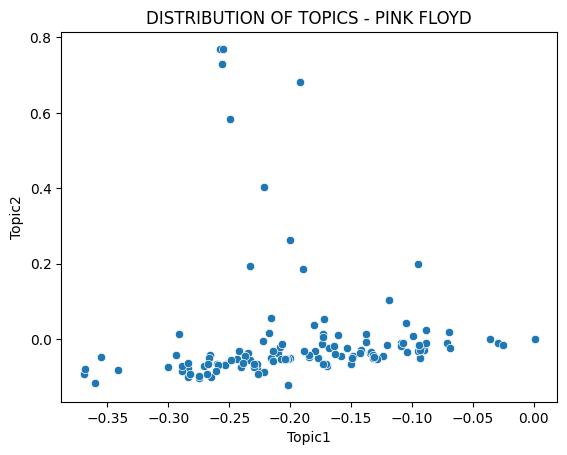

In [22]:
import seaborn as sns

sns.scatterplot(x="Topic1", y="Topic2", data= topics).set(title="DISTRIBUTION OF TOPICS - PINK FLOYD");

In [23]:
songs["Topic1"] = topics["Topic1"]
songs["Topic2"] = topics["Topic2"]

The songs from the band's "golden phase" (70s, green/blue colors) are the most versatile, in the sense that they cover both topics (although topic 1 is always the most discussed throughout Pink Floyd's career):

<function seaborn.relational.scatterplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None, **kwargs)>

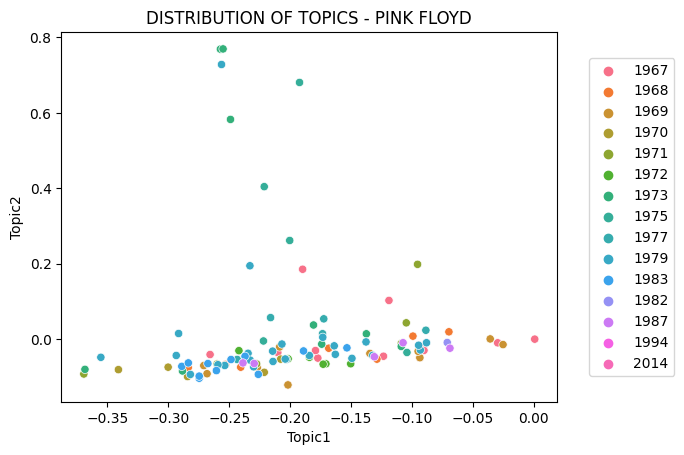

In [24]:
sns.scatterplot(x="Topic1", y="Topic2", hue="year", data= songs).set(title="DISTRIBUTION OF TOPICS - PINK FLOYD");
plt.legend(loc='right', bbox_to_anchor=(1.25, 0.5), ncol=1)
sns.scatterplot

#### **Analysis - Waters era *vs.* Gilmour era**


---

In [25]:
### WATERS ERA ###

# count the frequency of each token
frequency = defaultdict(int)
for text in lyrics_waters:
    for token in text:
        frequency[token] += 1
        
# remove words that appear only once
lyrics_waters = [
    [token for token in lyric if frequency[token] > 1]
    for lyric in lyrics_waters
]

# prepare the corpus and the list of tokens (dictionary)
dictionary_waters = corpora.Dictionary(lyrics_waters)
corpus_waters = [dictionary_waters.doc2bow(lyric) for lyric in lyrics_waters]

### GILMOUR ERA ###

# count the frequency of each token
frequency = defaultdict(int)
for text in lyrics_gilmour:
    for token in text:
        frequency[token] += 1
        
# remove words that appear only once
lyrics_gilmour = [
    [token for token in lyric if frequency[token] > 1]
    for lyric in lyrics_gilmour
]

# prepare the corpus and the list of tokens (dictionary)
dictionary_gilmour = corpora.Dictionary(lyrics_gilmour)
corpus_gilmour = [dictionary_gilmour.doc2bow(lyric) for lyric in lyrics_gilmour]

In [26]:
# creates LSA model
from gensim import models

# step 1 -- inicializes TF-IDF model
tfidf_waters = models.TfidfModel(corpus_waters)
tfidf_gilmour = models.TfidfModel(corpus_gilmour) 

# step 2 -- creates the term-document matrix
corpus_tfidf_waters = tfidf[corpus_waters]
corpus_tfidf_gilmour = tfidf[corpus_gilmour]

# initialize the LSI model - let's create 2 topics for visualization purposes
lsi_model_waters = models.LsiModel(corpus_tfidf_waters, id2word=dictionary_waters, num_topics=2)
lsi_model_gilmour = models.LsiModel(corpus_tfidf_gilmour, id2word=dictionary_gilmour, num_topics=2)

# apply the transformation to the corpus
corpus_lsi_waters = lsi_model_waters[corpus_tfidf_waters]
corpus_lsi_gilmour = lsi_model_gilmour[corpus_tfidf_gilmour]

Equation of topics - **Waters era**:

In [27]:
lsi_model_waters.print_topics()

[(0,
  '0.801*"’" + 0.181*"ooh" + 0.168*"need" + 0.161*"wall" + 0.127*"go" + 0.114*"get" + 0.091*"behind" + 0.085*"brick" + 0.083*"got" + 0.082*"babe"'),
 (1,
  '0.904*"ooh" + -0.216*"’" + 0.148*"babe" + 0.110*"di" + 0.104*"ah" + 0.094*"need" + -0.070*"wall" + 0.070*"go" + 0.059*"babi" + 0.056*"ice"')]

Equation of topics - **Gilmour era**:

In [28]:
lsi_model_gilmour.print_topics()

[(0,
  '0.651*"’" + 0.225*"eye" + 0.182*"one" + 0.181*"word" + 0.147*"away" + 0.142*"world" + 0.141*"turn" + 0.134*"know" + 0.126*"time" + 0.122*"talk"'),
 (1,
  '-0.356*"thing" + -0.326*"word" + 0.267*"’" + 0.219*"eye" + -0.212*"louder" + -0.206*"day" + 0.198*"alway" + -0.175*"understand" + -0.173*"sum" + 0.167*"talk"')]

In [29]:
# to analyze these topics let's turn them into a DataFrame
import numpy as np

topics_waters = pd.DataFrame([[t1, t2] for (_,t1),(_,t2) in corpus_lsi_waters],columns=["Topic1","Topic2"])
topics_gilmour = pd.DataFrame([[t1, t2] for (_,t1),(_,t2) in corpus_lsi_gilmour],columns=["Topic1","Topic2"])

As you can see in the plots below, songs from the Gilmour era are more evenly distributed between the two topics, while songs from the Waters era more strongly follow the same theme. This is related to the characteristics discussed at the beginning of the project. Waters' work has strong themes of politics and repetition of terms (which bring strength to the speech), while Gilmour's has more open and diverse lyrics.

**Distribution of Waters-era songs in topics:**

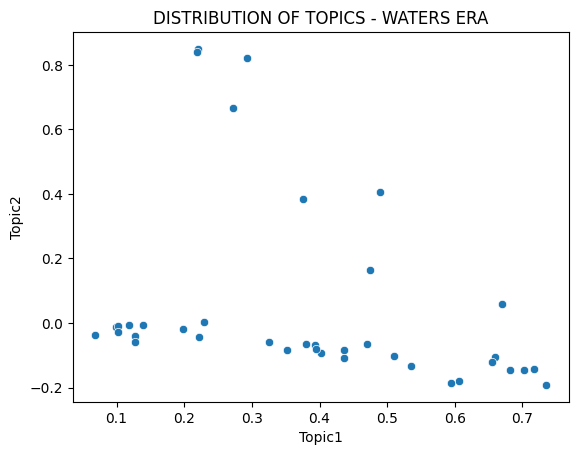

In [30]:
import seaborn as sns

sns.scatterplot(x="Topic1", y="Topic2", data= topics_waters).set(title="DISTRIBUTION OF TOPICS - WATERS ERA");

**Distribution of Gilmour-era songs in topics:**

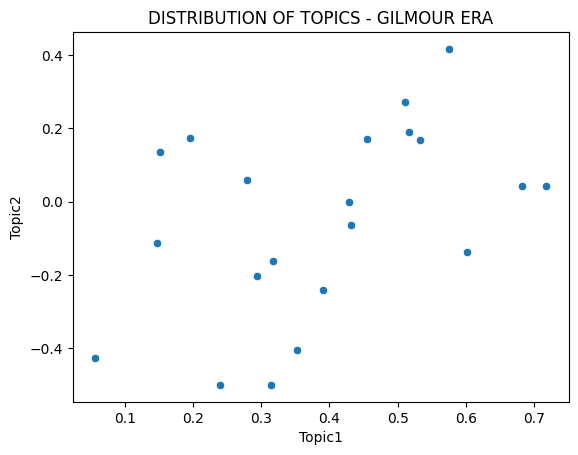

In [31]:
sns.scatterplot(x="Topic1", y="Topic2", data= topics_gilmour).set(title="DISTRIBUTION OF TOPICS - GILMOUR ERA");

### **Q&A Systems**
---

For the second part of this project, a database of questions and answers about the band Pink Floyd was built based on information from the [wikipedia page](https://pt.wikipedia.org/wiki/Pink_Floyd). The base can be downloaded from [drive link](https://drive.google.com/file/d/13UCuGbGdOBr-_XPelBmEhexHP7vDmx2a/view?usp=sharing).

A Questions and Answers System (Q&A - *Questions and Answers*) recovers information from a sent query, being implemented mainly in situations where the user uses natural language. Once this is done, it is important to implement a system that recognizes the intent of the question even if it is not identical to the question registered in the original query base (approximation method).

---

Import the Q&A base:

In [32]:
import pandas as pd

data = pd.read_csv('/content/QA-pinkfloyd.csv', sep=';')

data

,Question,Answer
0,What is Pink Floyd?,Pink Floyd were an English rock band formed in...
1,What is the musical genre of the band Pink Floyd?,"Mainly progressive, psychedelic and experiment..."
2,What country is Pink Floyd from?,"London, England"
3,How many records did Pink Floyd sell?,250 million
4,When was Pink Floyd founded?,In 1964
5,By whom was Pink Floyd founded?,"Syd Barrett (guitar, lead vocals), Nick Mason ..."
6,What are Pink Floyd albums?,"The Piper at the Gates of Dawn (1967), A Sauce..."
7,Who were Pink Floyd members?,"Nick Mason – drums, percussion, vocals (1964–1..."
8,What is Pink Floyd's best album?,"Wish You Were Here, The Dark Side of the Moon,..."
9,Is Pink Floyd in the Rock and Roll Hall of Fame?,Yes. Pink Floyd were inducted into the US Rock...


In [33]:
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 KB 906.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 50.0 MB/s eta 0:00:00


The **getApproximateAnswer2** function in the cell below considers approximate string matching using the **Levenshtein distance**, allowing for grammatical errors or certain text differences, since there are many ways for the user to ask the same thing, but in a different way. different forms in natural language.

In [34]:
from Levenshtein import ratio

def getApproximateAnswer2(q):
    max_score = 0
    answer = ""
    prediction = ""
    for idx, row in data.iterrows():
        score = ratio(row["Question"], q)
        if score >= 0.9: # I'm sure, stop here
            return row["Answer"], score, row["Question"]
        elif score > max_score: # I'm unsure, continue
            max_score = score
            answer = row["Answer"]
            prediction = row["Question"]

    if max_score > 0.5: # treshold is lowered
        return answer, max_score, prediction
    return "Sorry, I didn't get you.", max_score, prediction

The **getResults** function is responsible for printing the query results (Q&A system tests):

In [35]:
def getResults(questions, fn):
    def getResult(q):
        answer, score, prediction = fn(q)
        return [q, prediction, answer, score]

    return pd.DataFrame(list(map(getResult, questions)), columns=["Question", "Prediction", "Answer", "Score"])

For the test base we will create some possible entries in natural language that any user could send as input to our Q&A system:

In [36]:
test_data = [
    "Who are Pink Floyd members?",
    "Sold records of Pink Floyd",
    "The best albums of Pink Floyd band",
    "What is Pink Floyd music like?",
    "Where is Pink Floyd from?",
    "Is Pink Floyd in Hall of Fame?",
    "Pink Floyd still exists?",
    "Is Pink Floyd alive?",
    "When was Pink Floyd created?",
    "What is the music type the band Pink Floyd?"
]

In [37]:
getResults(test_data, getApproximateAnswer2)

,Question,Prediction,Answer,Score
0,Who are Pink Floyd members?,Who were Pink Floyd members?,"Nick Mason – drums, percussion, vocals (1964–1...",0.945455
1,Sold records of Pink Floyd,How many records did Pink Floyd sell?,250 million,0.666667
2,The best albums of Pink Floyd band,When was Pink Floyd founded?,In 1964,0.612903
3,What is Pink Floyd music like?,What are Pink Floyd music themes?,"Mainly disillusionment, absence, and non-being...",0.793651
4,Where is Pink Floyd from?,What country is Pink Floyd from?,"London, England",0.807018
5,Is Pink Floyd in Hall of Fame?,Is Pink Floyd in the Rock and Roll Hall of Fame?,Yes. Pink Floyd were inducted into the US Rock...,0.769231
6,Pink Floyd still exists?,Is Pink Floyd still in activity?,Gilmour said The Endless River (2014) would be...,0.714286
7,Is Pink Floyd alive?,Are Pink Floyd members alive?,Not all members. Richard Wright passed away in...,0.734694
8,When was Pink Floyd created?,When was Pink Floyd founded?,In 1964,0.821429
9,What is the music type the band Pink Floyd?,What is the musical genre of the band Pink Floyd?,"Mainly progressive, psychedelic and experiment...",0.869565


As you can see from the result above, our Q&A system performed well **(90% correct predictions)**. Of the ten tests performed, it returned a response for all, although it made a wrong prediction in line 2 (false positive). It is important to consider that the database questions are fairly short, with few words. With this, there is a greater chance of a false positive occurring, including because the name "Pink Floyd" appears in all of them. Better elaborated questions could guarantee a better assertiveness of the model, although the result achieved was good.



---

***I see you on the dark side of the moon***



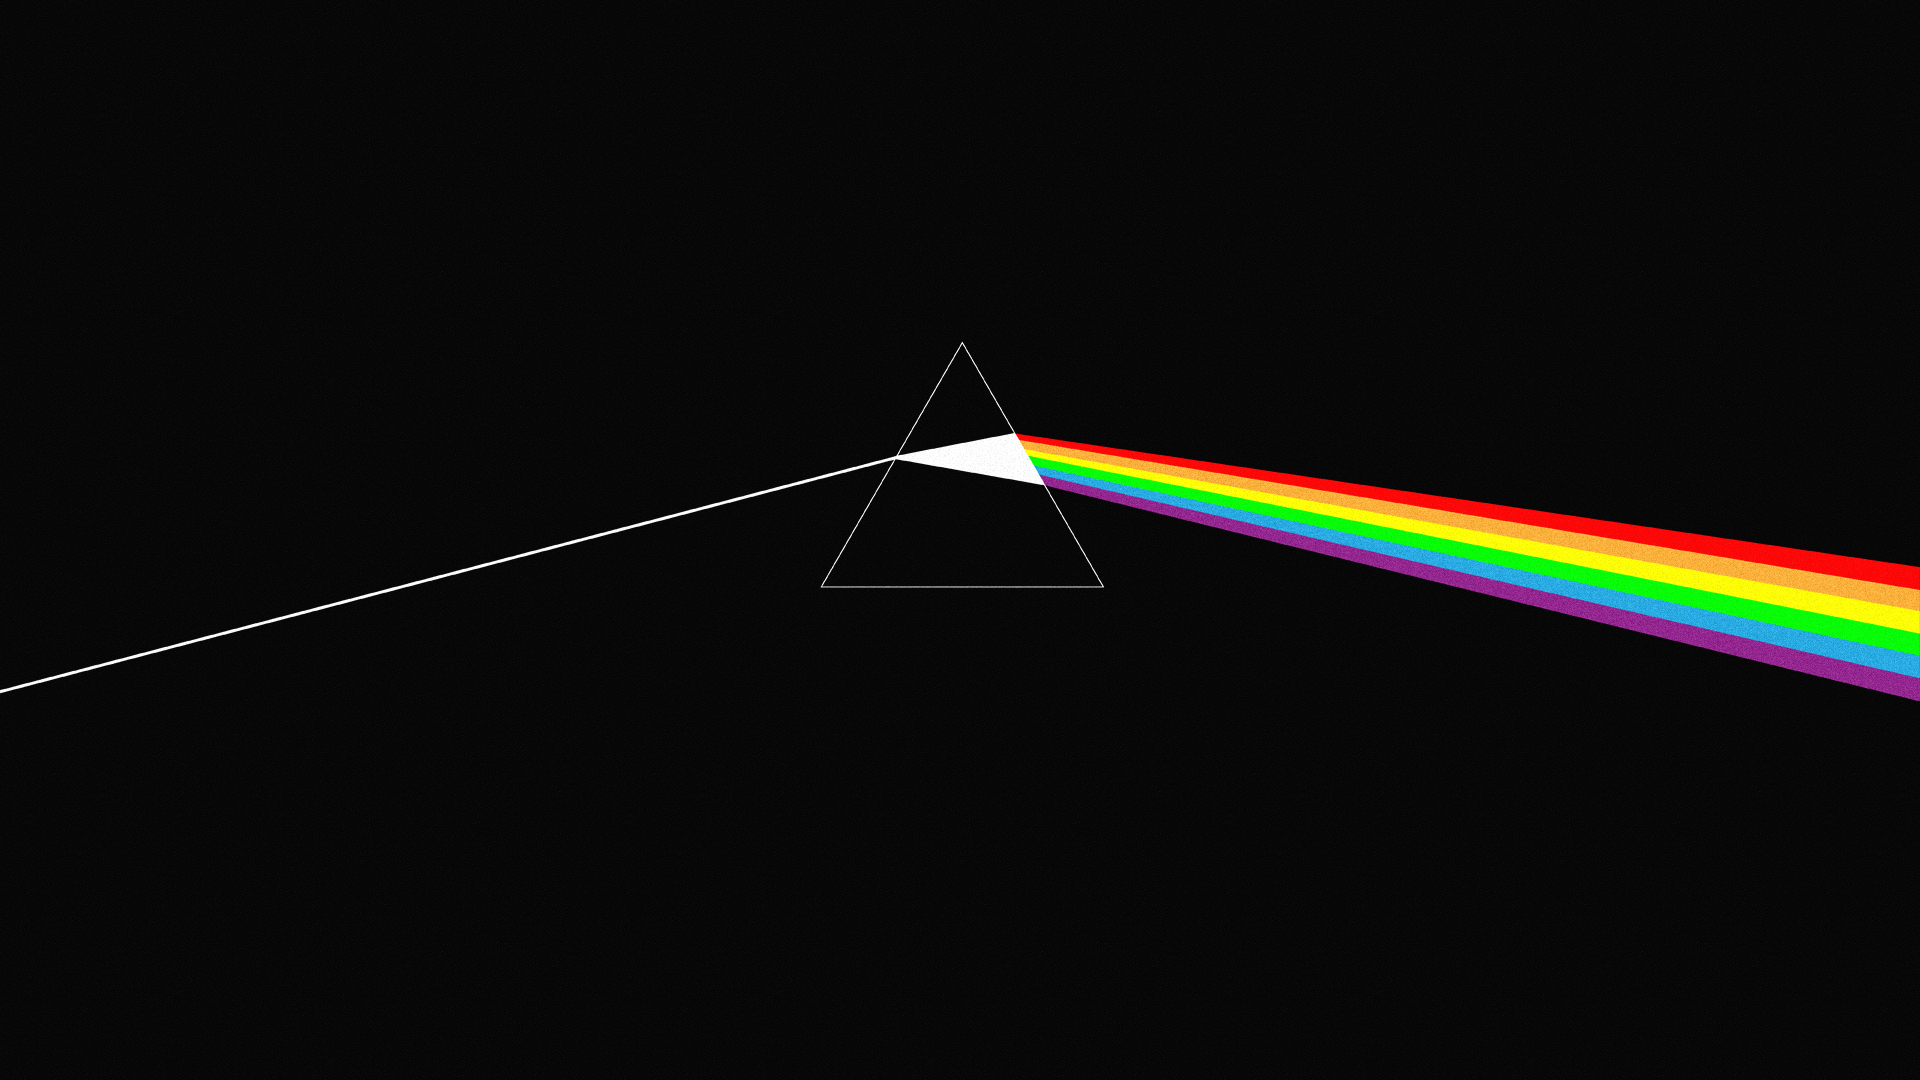